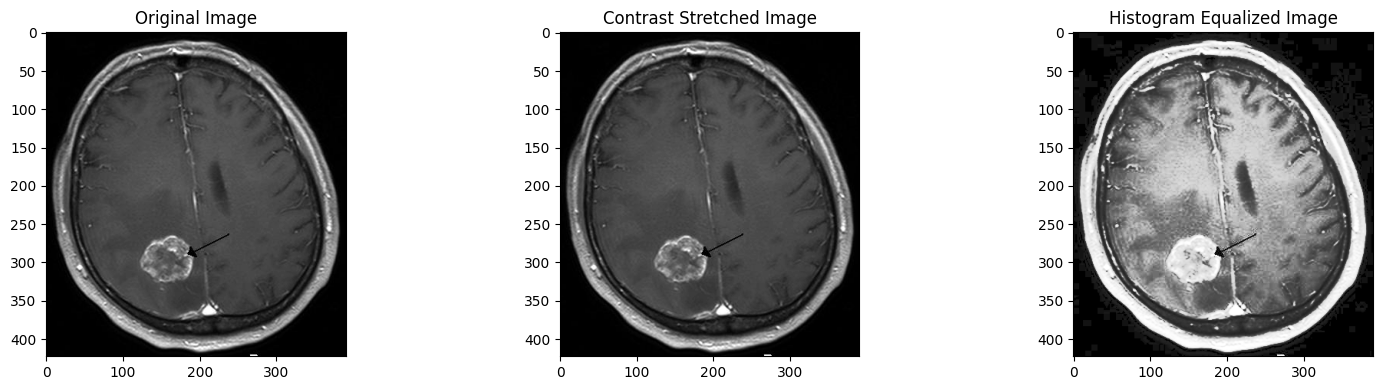

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the grayscale medical image
image = cv2.imread('images/brain_tumor.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Apply contrast stretching
def contrast_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched_image = ((image - min_val) / (max_val - min_val)) * 255
    return stretched_image.astype(np.uint8)

contrast_stretched_image = contrast_stretching(image)

# Step 3: Apply histogram equalization
hist_eq_image = cv2.equalizeHist(image)

# Display all images in one row
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(contrast_stretched_image, cmap='gray')
plt.title('Contrast Stretched Image')

plt.subplot(1, 3, 3)
plt.imshow(hist_eq_image, cmap='gray')
plt.title('Histogram Equalized Image')

plt.tight_layout()
plt.show()


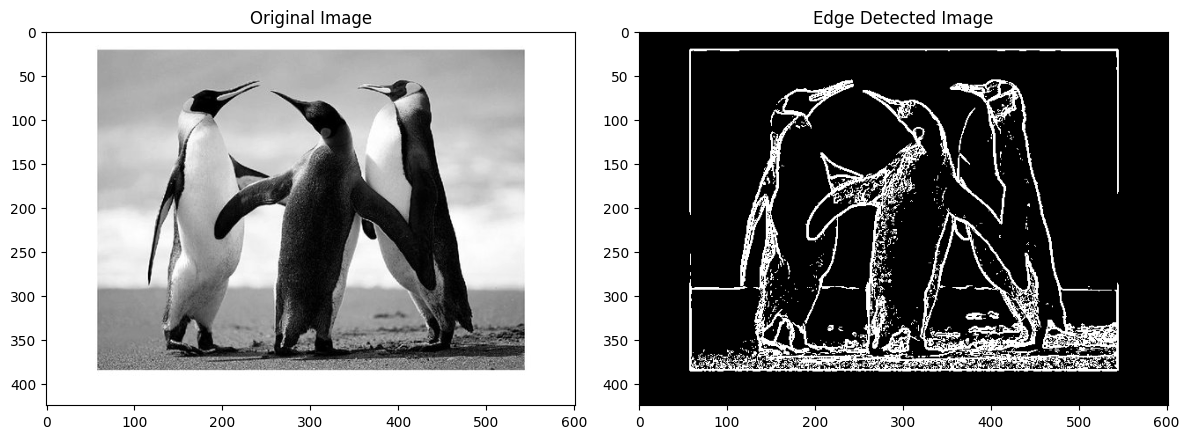

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image and convert it to grayscale
image = cv2.imread('images/pinguin.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Apply the Sobel operator to calculate gradients
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Step 3: Compute the magnitude of gradients
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Step 4: Apply thresholding to detect edges
threshold = 100
edge_image = np.where(gradient_magnitude > threshold, 255, 0).astype(np.uint8)

# Step 5: Display the original and edge-detected images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edge_image, cmap='gray')
plt.title('Edge Detected Image')

plt.tight_layout()
plt.show()


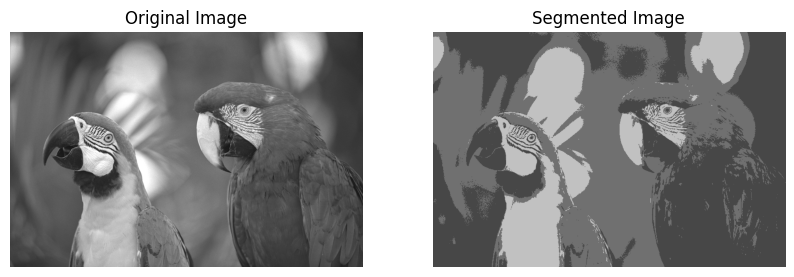

In [9]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('images/parrots.jpg')

# Convert the image to RGB (OpenCV loads images in BGR format by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 2: Reshape the image into a 2D array of pixels
reshaped_image = image_rgb.reshape((-1, 3))

# Step 3: Define the number of clusters (K)
num_clusters = 3

# Step 4: Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(reshaped_image)

# Step 5: Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Step 6: Generate segmented image
segmented_image = centroids[labels].reshape(image_rgb.shape)

# Step 7: Display the original and segmented images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Segmented Image')
plt.axis('off')

plt.show()